Epoch 1/20


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


390/390 ━━━━━━━━━━━━━━━━━━━━ 53s 129ms/step - accuracy: 0.3102 - loss: 1.8765 - val_accuracy: 0.4851 - val_loss: 1.4337
Epoch 2/20
  1/390 ━━━━━━━━━━━━━━━━━━━━ 34s 89ms/step - accuracy: 0.5312 - loss: 1.3666

/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


390/390 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.5312 - loss: 0.6850 - val_accuracy: 0.4978 - val_loss: 1.4022
Epoch 3/20
390/390 ━━━━━━━━━━━━━━━━━━━━ 77s 125ms/step - accuracy: 0.4880 - loss: 1.4141 - val_accuracy: 0.5671 - val_loss: 1.1994
Epoch 4/20
390/390 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.4844 - loss: 0.6411 - val_accuracy: 0.5596 - val_loss: 1.2120
Epoch 5/20
390/390 ━━━━━━━━━━━━━━━━━━━━ 50s 126ms/step - accuracy: 0.5444 - loss: 1.2818 - val_accuracy: 0.6267 - val_loss: 1.0597
Epoch 6/20
390/390 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.5078 - loss: 0.6270 - val_accuracy: 0.6353 - val_loss: 1.0418
Epoch 7/20
390/390 ━━━━━━━━━━━━━━━━━━━━ 50s 126ms/step - accuracy: 0.5751 - loss: 1.1857 - val_accuracy: 0.6055 - val_loss: 1.1095
Epoch 8/20
390/390 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.6406 - loss: 0.5736 - val_accuracy: 0.6097 - val_loss: 1.0959
Epoch 9/20
390/390 ━━━━━━━━━━━━━━━━━━━━ 50s 126ms/step - accuracy: 0.5986 - loss: 1.1240 - val_accuracy: 0

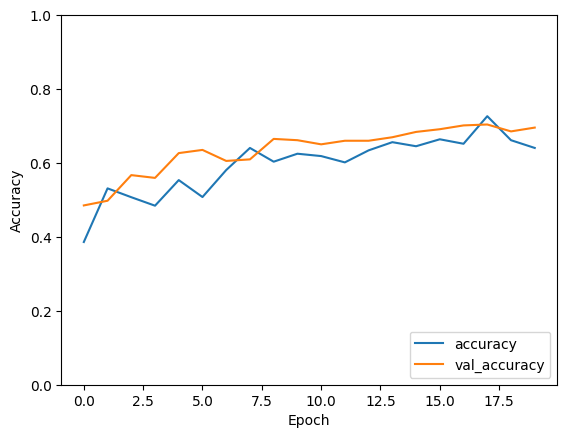

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


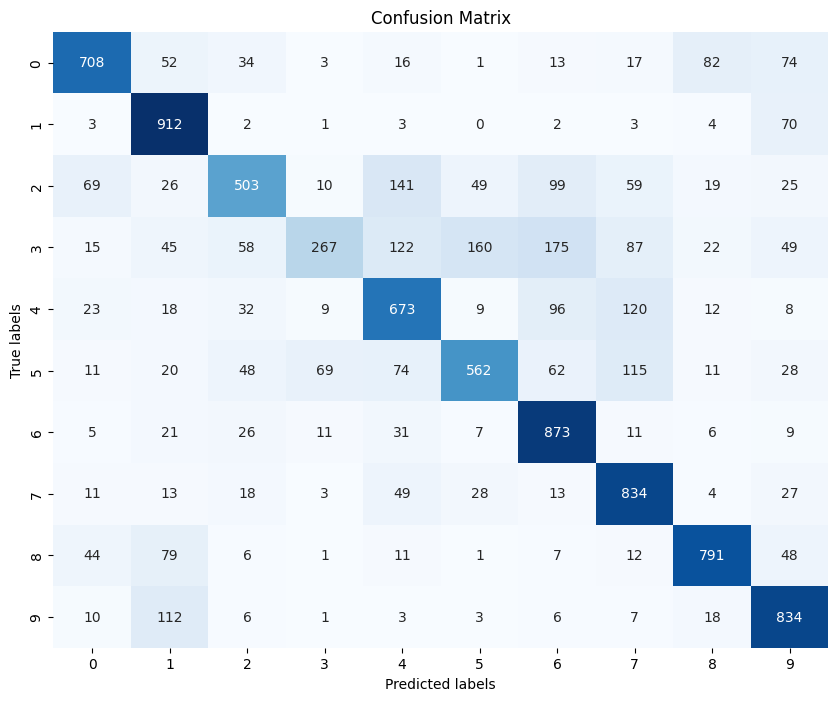

NameError: name 'preprocess_function' is not defined

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Preprocessing - Enhance image quality (example: normalization)
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Convert class vectors to binary class matrices
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Define CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Data Augmentation
datagen = ImageDataGenerator(rotation_range=15, width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
datagen.fit(x_train)

# Train the model
history = model.fit(datagen.flow(x_train, y_train, batch_size=128), steps_per_epoch=int(len(x_train) / 128), epochs=20, validation_data=(x_test, y_test))


# Evaluate model performance
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Accuracy without preprocessing:", test_acc)

# Plot accuracy and loss over epochs
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

# Predictions
y_pred = np.argmax(model.predict(x_test), axis=-1)
y_true = np.argmax(y_test, axis=-1)

# Confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Report accuracy with preprocessing
# Assuming preprocessing is done before model evaluation
x_test_preprocessed = preprocess_function(x_test)  # Apply your preprocessing function
test_loss_preprocessed, test_acc_preprocessed = model.evaluate(x_test_preprocessed, y_test)
print("Test Accuracy with preprocessing:", test_acc_preprocessed)

# Predictions with preprocessing
y_pred_preprocessed = np.argmax(model.predict(x_test_preprocessed), axis=-1)

# Confusion matrix with preprocessing
conf_matrix_preprocessed = confusion_matrix(y_true, y_pred_preprocessed)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_preprocessed, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix with Preprocessing')
plt.show()


Epoch 1/20


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


390/390 ━━━━━━━━━━━━━━━━━━━━ 52s 127ms/step - accuracy: 0.3476 - loss: 1.7656 - val_accuracy: 0.4240 - val_loss: 175.8355
Epoch 2/20
  1/390 ━━━━━━━━━━━━━━━━━━━━ 34s 90ms/step - accuracy: 0.4766 - loss: 1.5133

/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


390/390 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.4766 - loss: 0.7586 - val_accuracy: 0.4126 - val_loss: 192.0369
Epoch 3/20
390/390 ━━━━━━━━━━━━━━━━━━━━ 80s 130ms/step - accuracy: 0.5245 - loss: 1.3203 - val_accuracy: 0.4583 - val_loss: 170.5444
Epoch 4/20
390/390 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.6016 - loss: 0.6247 - val_accuracy: 0.4491 - val_loss: 177.1938
Epoch 5/20
390/390 ━━━━━━━━━━━━━━━━━━━━ 51s 128ms/step - accuracy: 0.5721 - loss: 1.2100 - val_accuracy: 0.4735 - val_loss: 146.1585
Epoch 6/20
390/390 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.5547 - loss: 0.5689 - val_accuracy: 0.4730 - val_loss: 147.5399
Epoch 7/20
390/390 ━━━━━━━━━━━━━━━━━━━━ 50s 126ms/step - accuracy: 0.6025 - loss: 1.1270 - val_accuracy: 0.4936 - val_loss: 137.4073
Epoch 8/20
390/390 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.6328 - loss: 0.5160 - val_accuracy: 0.4927 - val_loss: 139.1238
Epoch 9/20
390/390 ━━━━━━━━━━━━━━━━━━━━ 53s 134ms/step - accuracy: 0.6245 - loss: 1.0601 - v

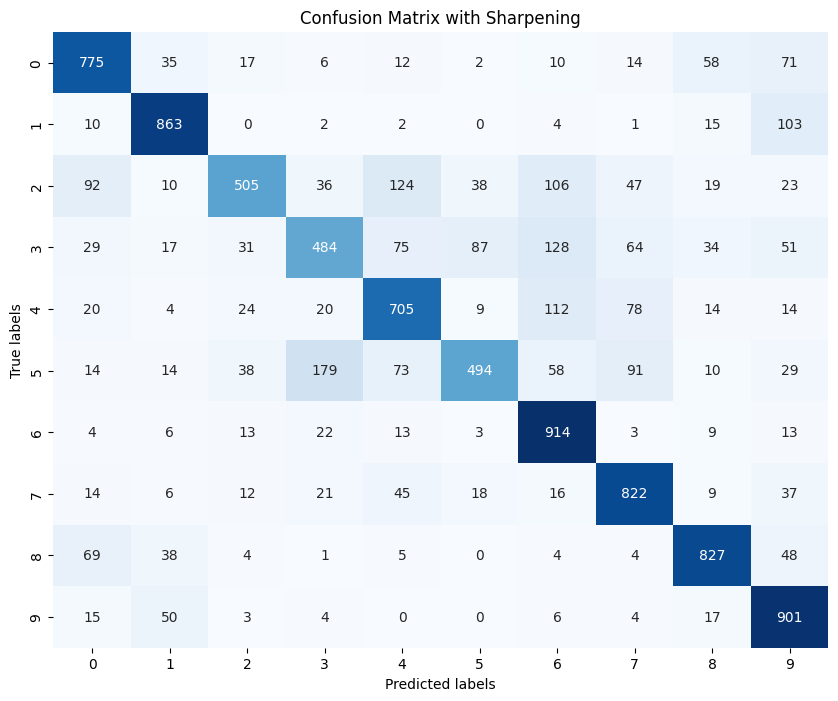

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import seaborn as sns
from skimage import exposure, filters

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Preprocessing functions
def normalize_images(images):
    # Normalize images to [0, 1]
    normalized_images = images.astype('float32') / 255
    return normalized_images

def sharpen_images(images):
    # Apply sharpening filter
    sharpened_images = np.zeros_like(images)
    for i, img in enumerate(images):
        sharpened_images[i] = filters.unsharp_mask(img)
    return sharpened_images

def adjust_contrast(images, contrast_factor=1.5):
    # Adjust contrast of images
    adjusted_images = np.zeros_like(images)
    for i, img in enumerate(images):
        adjusted_images[i] = exposure.adjust_gamma(img, contrast_factor)
    return adjusted_images

# Apply preprocessing
x_train_normalized = normalize_images(x_train)
x_test_normalized = normalize_images(x_test)

x_train_sharpened = sharpen_images(x_train_normalized)
x_test_sharpened = sharpen_images(x_test_normalized)

x_train_contrast_adjusted = adjust_contrast(x_train_normalized)
x_test_contrast_adjusted = adjust_contrast(x_test_normalized)

# Convert class vectors to binary class matrices
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Define CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Data Augmentation
datagen = ImageDataGenerator(rotation_range=15, width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
datagen.fit(x_train_sharpened)

# Train the model
history = model.fit(datagen.flow(x_train_sharpened, y_train, batch_size=128), steps_per_epoch=int(len(x_train) / 128), epochs=20, validation_data=(x_test, y_test))

# Evaluate model performance
test_loss, test_acc = model.evaluate(x_test_sharpened, y_test)
print("Test Accuracy with Sharpening:", test_acc)

# Predictions
y_pred = np.argmax(model.predict(x_test_sharpened), axis=-1)
y_true = np.argmax(y_test, axis=-1)

# Confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix with Sharpening')
plt.show()
